In [59]:
from csv import reader
from math import sqrt
from random import seed
from random import randrange
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time as time
import numpy as np

In [60]:
input_data ='diabetes.csv'

In [61]:
def load_csv(input_data):
    dataset = list()
    with open(input_data,'r') as file:
        read =reader(file)
        for x in read:
            if not x:
                continue
            dataset.append(x)
    dataset =dataset[1:]
    return dataset

In [62]:
df =pd.read_csv(input_data)

In [63]:
print(df.shape)
df.head(n=5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


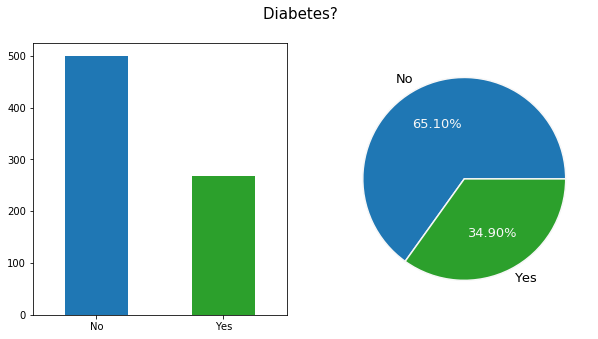

In [64]:
df["Outcome"].value_counts()

f, ax = plt.subplots(1, 2, figsize = (10, 5))
f.suptitle("Diabetes? ", fontsize = 15.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

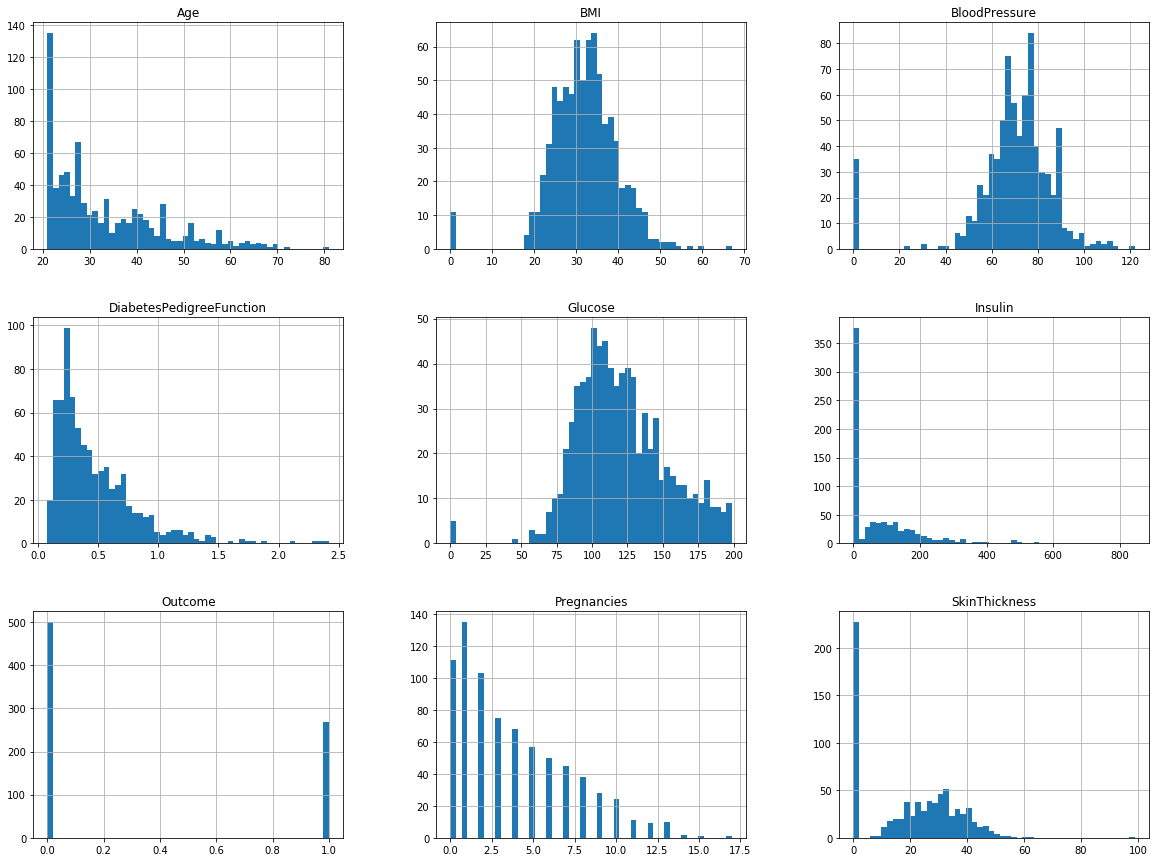

In [65]:
# Analyzing the input dataset
df.hist(bins=50, figsize=(20, 15))
plt.show() 

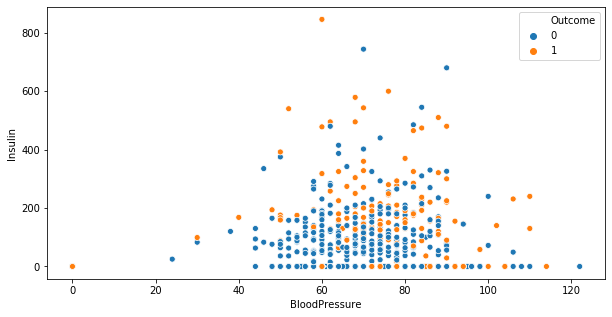

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="BloodPressure", y="Insulin",hue="Outcome")

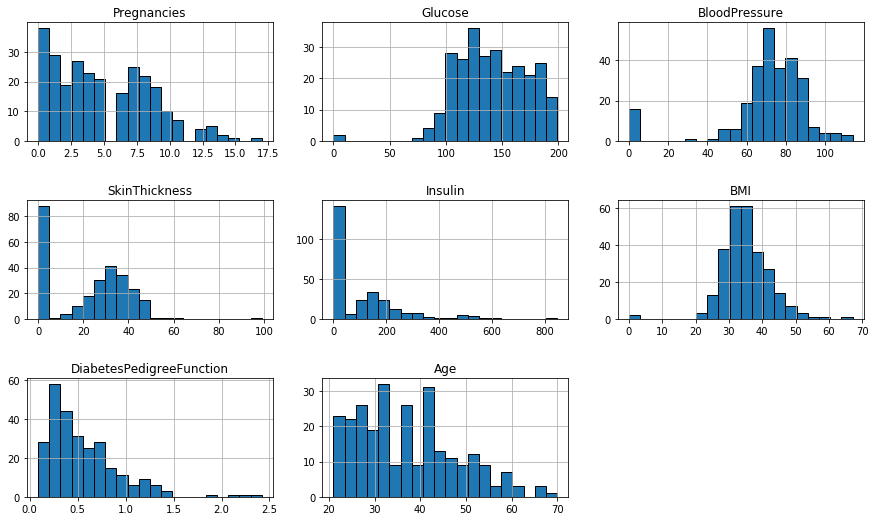

In [67]:
import itertools
#Analysis when the person has diabetes

diab1=df[df['Outcome']==1]
colu=df.columns[:8]
plt.subplots(figsize=(15,12))
length1=len(colu)
for i,j in itertools.zip_longest(colu,range(length1)):
    plt.subplot((length1/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

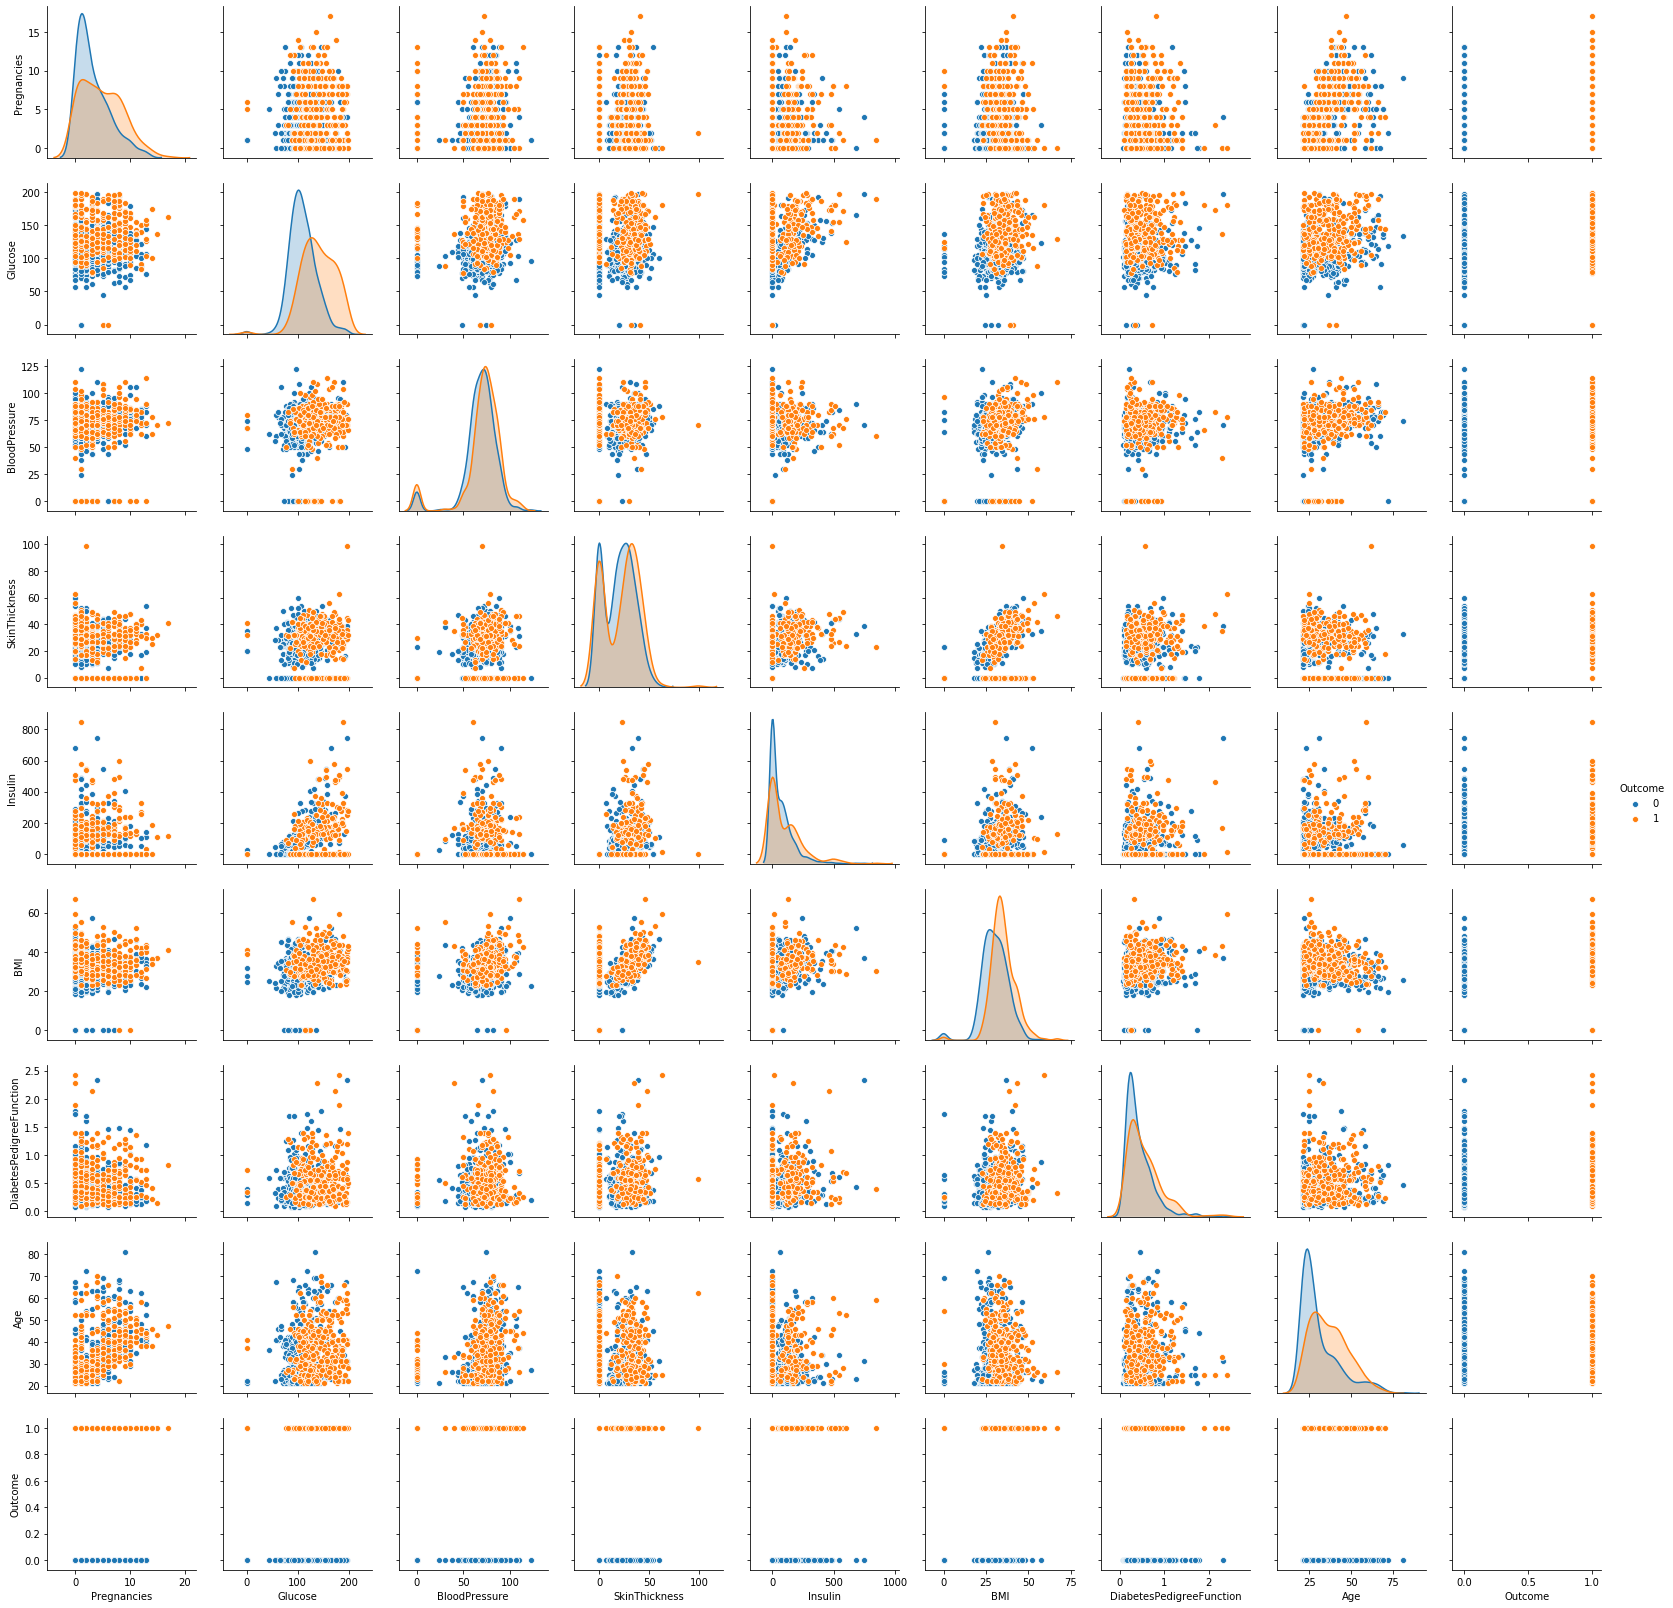

In [68]:
sns.pairplot(df, hue="Outcome", diag_kind='kde')

In [69]:
data_X = df.loc[:,df.columns!= "Outcome"].values.astype('float32')
data_Y =df["Outcome"].values

In [70]:
from sklearn.model_selection import train_test_split
from operator import itemgetter, attrgetter

X_t, X_test, Y_t, Y_test = train_test_split(data_X, data_Y,test_size=0.15,random_state=1)
print(Y_test.shape)

(116,)


In [71]:
import scipy.spatial.distance as dist2

def euclidean_distance(given,row):
    dist = 0.0
    for i in range(len(given)):
        dist+=(given[i] -row[i])**2
    return sqrt(dist)

def hamming_distance(given,row):
    dist = 0.0
    dist = dist2.hamming(given, row)
    return dist

def manhattan_distance(row1,row2):
    dist = 0.0
    for i in range(len(row1)-1) :
        dist+= (row1[i] - row2[i])
    return dist

In [72]:
def getting_neighbours(metric, train, test_row,number):
    distances = list()
    for row in range(len(train)):
        if metric == "Euclidean":
            dist = euclidean_distance(test_row,train[row])
            distances.append((row, dist))
        elif metric == "Manhattan":
            dist =manhattan_distance(test_row,train[row])
            distances.append((row, dist))
        elif metric == "Hamming":
            dist =hamming_distance(test_row,train[row])
            distances.append((row, dist))
    distances.sort(key=lambda d: d[1])
    all_neighbor = list()
    for i in range(number):
        all_neighbor.append(distances[i][0])
    return all_neighbor

def predict_class(metric, train, test_row, number):
    neighbors =getting_neighbours(metric, train,test_row,number)
    
    classes= [int(Y_t[row]) for row in neighbors]
    prediction = max(set(classes),key=classes.count)
    return prediction

def k_neighbors(metric, train,test, number):
    pred =list()
    for row in test:
        neighb =predict_class(metric, train,row,number)
        pred.append(neighb)
    return (pred)

def find_accuracy(actual, predicted):
    correct =0

    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return ( correct/len(actual) ) * 100.0
def algorithm(metric, train1,test1,*arg):
    score = 0
    predicted =k_neighbors(metric, train1,test1, *arg)
    accuracy = find_accuracy(Y_test,predicted)
    score +=accuracy
    return score,predicted

In [73]:
k = input("Enter the k(number of nearest neighbor) value: ")
k = int(k)
metric = input("Enter the type of matrix - Euclidean / Manhattan / Hamming: ") #Enter "Euclidean" or "Manhattan" or "Hamming"
start = time.time()
s,predicted = algorithm(metric, X_t, X_test, k)
end = time.time()
print('Accuracy: '+str(s))
print("Time taken is: "+str(end-start))

Enter the k(number of nearest neighbor) value: 4
Enter the type of matrix - Euclidean / Manhattan / Hamming: Euclidean
Accuracy: 72.41379310344827
Time taken is: 2.998729705810547


Confusion Matrix
TP: 66 FN: 9
FP: 23 TN: 18


Text(0.5, 15.0, 'Predicted Label')

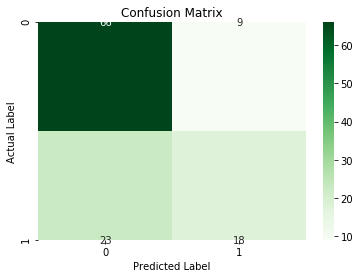

In [74]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
m = confusion_matrix(Y_test,predicted)

tp, fn, fp, tn = m.reshape(-1)
print("TP: "+str(tp)+" FN: "+str(fn))
print("FP: "+str(fp)+" TN: "+str(tn))

p = sns.heatmap(pd.DataFrame(m), annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [75]:
for x in range(5,40,6):
    start= time.time()
    s,pred = algorithm("Euclidean", X_t, X_test, x)
    end =time.time()
    print("When k = "+str(x))
    print("Accuracy is: "+str(s))
    print("Time taken: "+ str(end-start))

When k = 5
Accuracy is: 71.55172413793103
Time taken: 3.092054843902588
When k = 11
Accuracy is: 77.58620689655173
Time taken: 2.9557676315307617
When k = 17
Accuracy is: 79.3103448275862
Time taken: 2.9650068283081055
When k = 23
Accuracy is: 77.58620689655173
Time taken: 2.990579843521118
When k = 29
Accuracy is: 75.86206896551724
Time taken: 3.57289981842041
When k = 35
Accuracy is: 75.0
Time taken: 3.522923707962036


In [76]:
algo = ["Euclidean", "Manhattan", "Hamming"]
for i in algo:
    start= time.time()
    s,pred = algorithm(i, X_t, X_test, 3)
    end =time.time()
    print("When algo is "+str(i))
    print("Accuracy is: "+str(s))
    print("Time taken: "+ str(end-start))    

When algo is Euclidean
Accuracy is: 73.27586206896551
Time taken: 3.2756729125976562
When algo is Manhattan
Accuracy is: 64.65517241379311
Time taken: 0.81034255027771
When algo is Hamming
Accuracy is: 62.06896551724138
Time taken: 1.4256947040557861
